In [117]:
%matplotlib inline

from __future__ import division
import numpy as np
import menpo.io as mio
from menpo.feature import greyscale, no_op, igo, double_igo, centralize
from menpo.landmark import labeller, ibug_face_66
from menpo.visualize import (
    visualize_images, print_dynamic, progress_bar_str)
from alaborticcv2015.deepconvkernel.generative import (
    GenerativeLDCN, learn_pca_filters, learn_ica_filters)
from alaborticcv2015.deepconvkernel.discriminative import (
    DiscriminativeLDCN, learn_lda_filters, learn_mccf_filters)

# Load Generative Networks

In [179]:
# set options
features = greyscale
landmarks = True
learn_filters = learn_pca_filters
architecture = 3
n_layers = 1
n_filters = range(4, 34, 4)
patch_shape = range(3, 13, 2)
n_images = 1000
verbose = True

if learn_filters is learn_pca_filters:
    net_type = 'pca'
elif learn_filters is learn_ica_filters:
    net_type = 'ica'
elif learn_filters is learn_lda_filters:
    net_type = 'lda'
elif learn_filters is learn_mccf_filters:
    net_type = 'mccf'

if landmarks:
    patch_type = 'landmarks'
else:
    patch_type = 'grid'

string = '- Loading networks: '
networks = []
n_nets = len(n_filters) * len(patch_shape)
count = 0
# build generative networks
for nf in n_filters:
    nets = []
    actual_nf = 0
    for ps in patch_shape:
        count += 1
        if verbose:
            print_dynamic('{}{}'.format(
                string, progress_bar_str(count/n_nets, show_bar=True)))

        max_nf = ps * ps - 1
        if actual_nf < max_nf:
            file_name = ('/Users/joan/Desktop/alaborticcv2015/networks/'
                         + net_type
                         + '_'
                         + str(n_images)
                         + '_'
                         + features.__name__
                         + '_'
                         + str(architecture)
                         + '_'
                         + str(n_layers)
                         + '_'
                         + str(nf)
                         + '_'
                         + str(ps)
                         + '_'
                         + patch_type
                         + '.pkl.gz')
            nets.append(mio.import_pickle(file_name))
    networks.append(nets)

- Loading networks: [==========          ] 52%

ValueError: /Users/joan/Desktop/alaborticcv2015/networks/pca_1000_greyscale_3_1_20_3_landmarks.pkl.gz is not a file

In [184]:
dck_images = []
for nets in networks:
    dck_imgs = []
    for net in nets:
        dck_imgs += net.kernels_frequency(ext_shape=(100, 100))
    dck_images.append(dck_imgs)

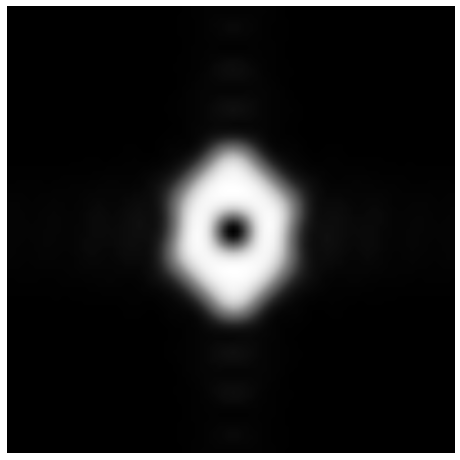

In [185]:
visualize_images(dck_images[1])

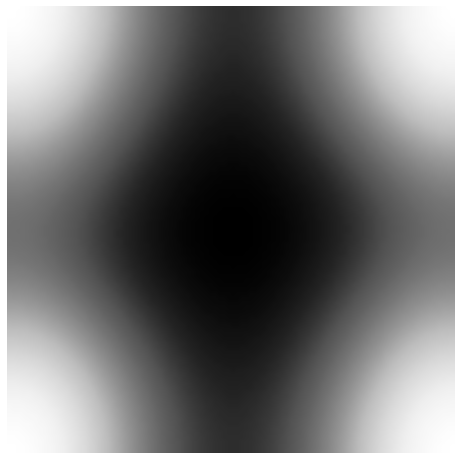

In [105]:
visualize_images(dck_images[0])

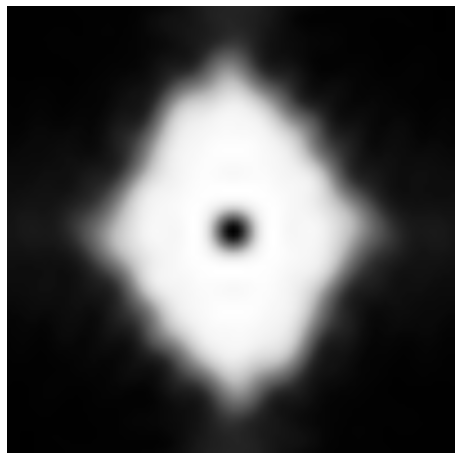

In [63]:
visualize_images(dck_images[0])

In [24]:
images = []
for i in mio.import_images('/data/PhD/DataBases/faces/lfpw/**/*.png', verbose=True, 
                           max_images=50):
    i.crop_to_landmarks_proportion_inplace(0.5)
    i = i.rescale_landmarks_to_diagonal_range(100)
    i = greyscale(i)
    labeller(i, 'PTS', ibug_face_66)
    images.append(i)

- Loading 50 assets: [====================] 100%

Build 1-layer PCA LinDeepConvNets:

In [48]:
n_filters = range(4, 34, 4)
shapes = [s for s in range(3, 19, 2)]

In [49]:
for nf in n_filters:
    for s in shapes:
        net = GenerativeLDCN(learn_filters=learn_pca_filters, 
                             n_filters=np.minimum(nf, s * s -1) ,
                             n_layers=1,
                             architecture=3,
                             normalize_patches=centralize,
                             normalize_filters=None,
                             patch_shape=(s, s))
        if landmarks:
            net.learn_network_from_landmarks(images, group='ibug_face_66', verbose=True)
        else:
            net.learn_network_from_grid(images, stride=(4, 4), verbose=True)
            
        file_name = ('/data/PhD/Models/alaborticcv2015/pca_net/pca_net_1_'
                     + str(3)
                     + '_'
                     + str(nf) 
                     + '_' 
                     + str(s)
                     + '.pkl.gz') 
        mio.export_pickle(net, file_name, overwrite=True)

- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning net

Build 2-layers PCA LinDeepConvNets:

In [54]:
architectures = range(3)
n_filters = range(32, 34, 4)
shapes = [s for s in range(5, 7, 2)]

In [55]:
# for a in architectures:
for nf in n_filters:
    for s in shapes:
        net = GenerativeLDCN(learn_filters=learn_ica_filters, 
                             n_filters=8, 
                             n_layers=3,
                             architecture=3,
                             normalize_patches=centralize,
                             normalize_filters=None,
                             patch_shape=(s, s))
        if landmarks:
            net.learn_network_from_landmarks(images, group='ibug_face_66', verbose=True)
        else:
            net.learn_network_from_grid(images, stride=(4, 4), verbose=True)

        file_name = ('/data/PhD/Models/alaborticcv2015/pca_net/pca_net_2_' 
                     + str(3)
                     + '_'
                     + str(nf) 
                     + '_' 
                     + str(s)
                     + '.pkl.gz') 
        mio.export_pickle(net, file_name, overwrite=True)

- Learning network
  - Layer 0: Done!
  - Layer 1: Done!
  - Layer 2: Done!


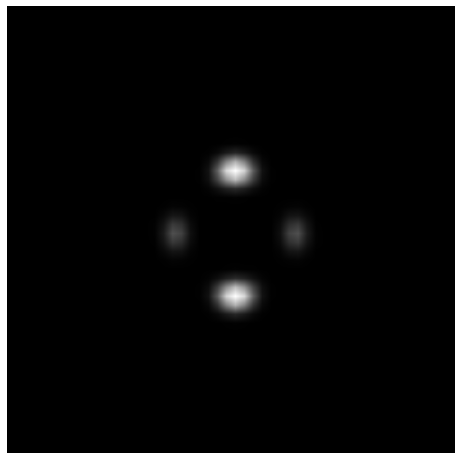

In [47]:
net.kernels_frequency((50,50))[-1].view()